In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data)
df.columns = boston_dataset.feature_names
df['MEDV'] = pd.DataFrame(boston_dataset.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [9]:
print("Number of null values per column:")
print(df.isnull().sum())
print("As shown, there are no missing parts to handle.")
# df.dropna(inplace=True)

train_set = df.sample(frac=0.80)
train_t = train_set['MEDV']
train_set = train_set.drop('MEDV', axis=1)

test_set = df[~df.index.isin(train_set.index)]
test_t = test_set['MEDV']
test_set = test_set.drop('MEDV', axis=1)

Number of null values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
As shown, there are no missing parts to handle.


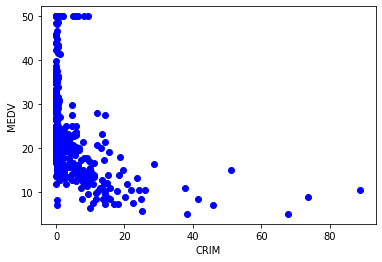

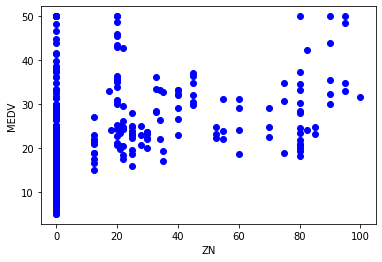

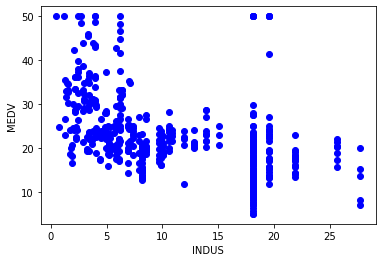

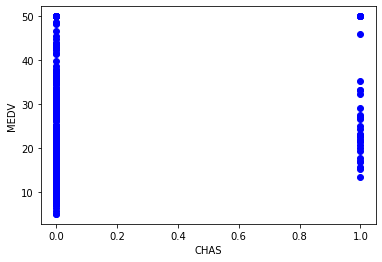

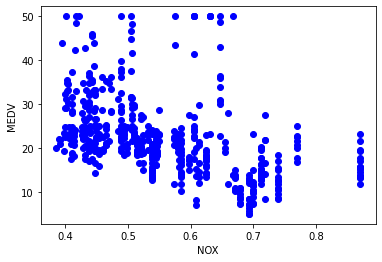

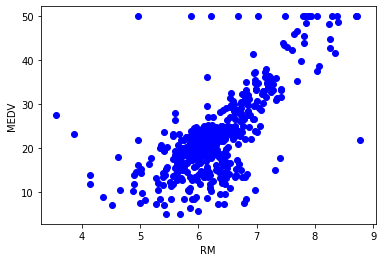

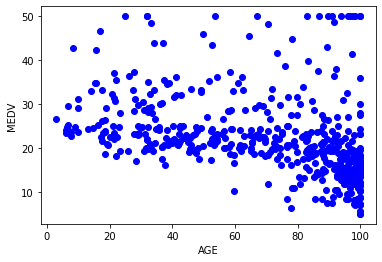

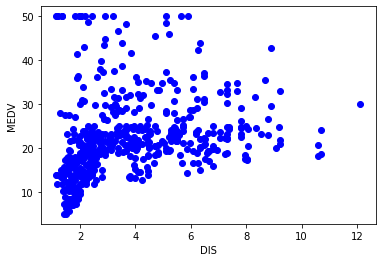

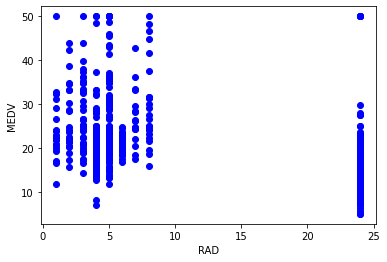

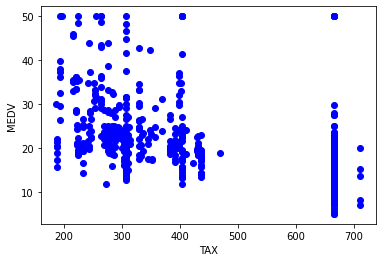

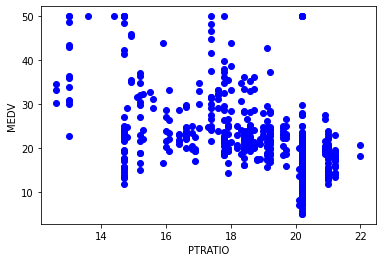

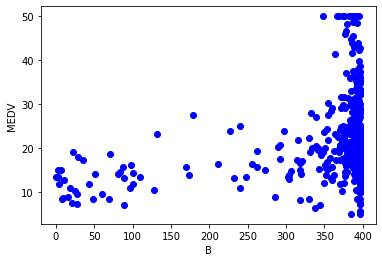

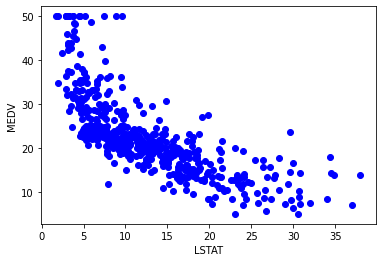

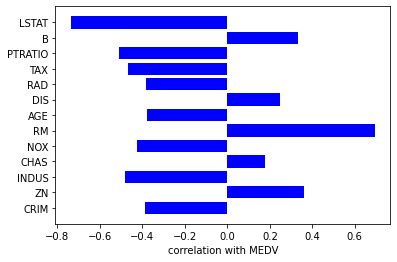

In [10]:
for feature in boston_dataset.feature_names:
    plt.figure()
    plt.plot(df[feature], df['MEDV'], 'bo')
    plt.ylabel('MEDV')
    plt.xlabel(feature)

correlation = df.iloc[ : , :-1].corrwith(df["MEDV"])
# print("the correlation between features and the target values:")
# print(correlation)
plt.figure()
plt.barh(correlation.index, correlation, color='b')
plt.xlabel('correlation with MEDV');

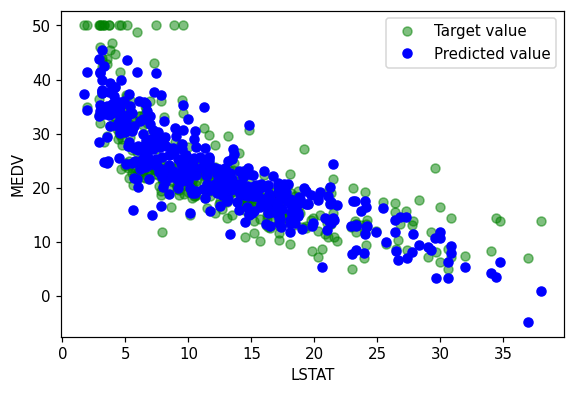

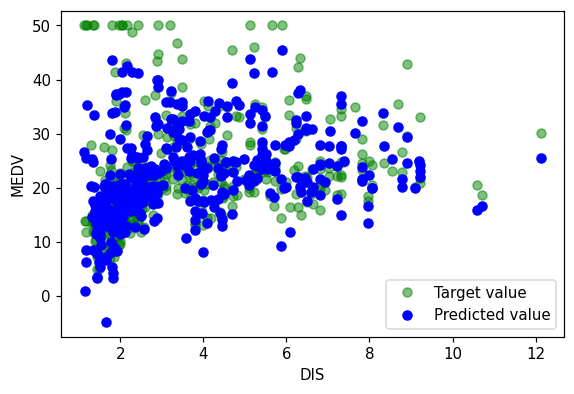

In [11]:
def generate_linear_phi(x_set):
    linear_phi = [[1] + [x_set.iloc[i, j] for j in range(len(x_set.columns))] for i in range(len(x_set))] 
    return np.array(linear_phi)

phi = generate_linear_phi(train_set)
linear_w_optimal = np.matmul(np.linalg.inv(np.dot(phi.T, phi)), np.matmul(phi.T, train_t))

def linear_model(x):
    global linear_w_optimal
    return linear_w_optimal[0] + np.dot(linear_w_optimal[1:].T, x)

predicted_train_set_with_linear_model = train_set.apply(lambda x: linear_model(x), axis=1)

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['LSTAT'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['LSTAT'], predicted_train_set_with_linear_model, 'bo', label='Predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
ax.legend()

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['DIS'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['DIS'], predicted_train_set_with_linear_model, 'bo', label='Predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
ax.legend()


predicted_test_set_with_linear_model = test_set.apply(lambda x: linear_model(x), axis=1)

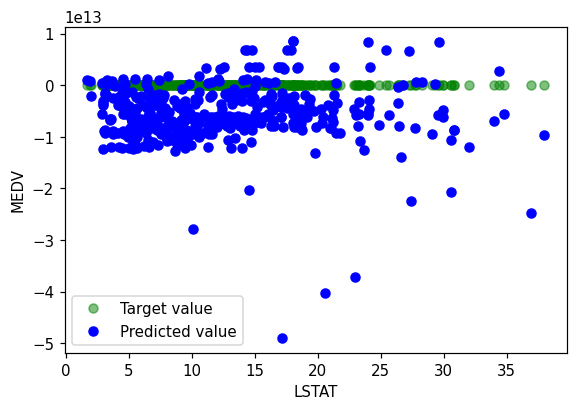

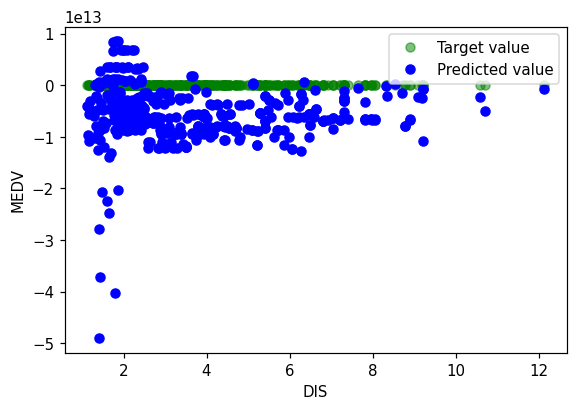

In [12]:
def generate_second_order_phi(x_set):
    second_order = [[x_set.iloc[i, j]**2 for j in range(len(x_set.columns))] for i in range(len(x_set))]
    second_order_phi = np.append(generate_linear_phi(x_set), second_order, axis=1)
    return second_order_phi
    
phi = generate_second_order_phi(train_set)
second_order_w_optimal = np.matmul(np.linalg.inv(np.dot(phi.T, phi)), np.matmul(phi.T, train_t))

def second_order_model(x):
    global second_order_w_optimal
    return np.dot(second_order_w_optimal.T, x)

predicted_train_set_with_second_order_model = pd.DataFrame(
    phi, index=train_set.index).apply(lambda x: second_order_model(x), axis=1)

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['LSTAT'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['LSTAT'], predicted_train_set_with_second_order_model, 'bo', label='Predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
ax.legend()

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['DIS'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['DIS'], predicted_train_set_with_second_order_model, 'bo', label='Predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
ax.legend()



predicted_test_set_with_second_order_model = pd.DataFrame(
    generate_second_order_phi(test_set), index=test_set.index).apply(lambda x: second_order_model(x), axis=1)

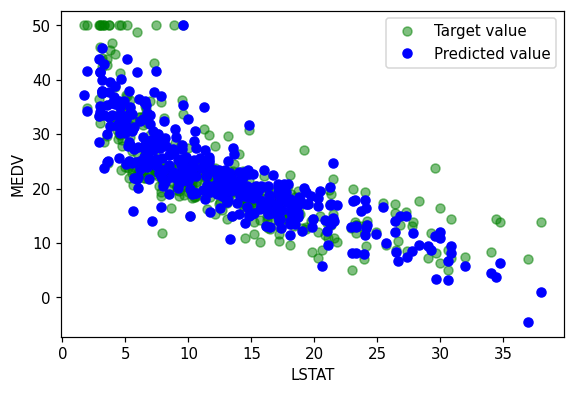

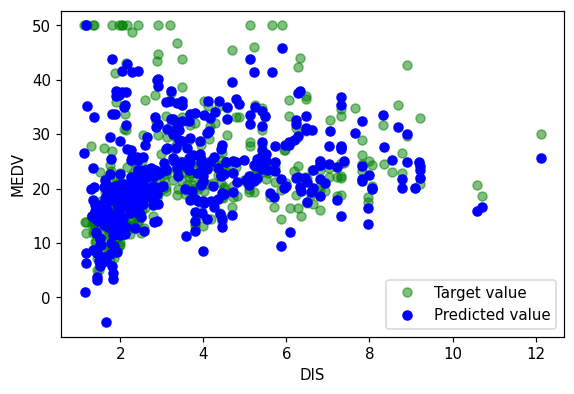

In [20]:
import math

def squer_norm_2(x):
    norm = 0
    for i in x:
        norm += i**2
    return norm

mu = train_set.sample(10)

def generate_gaussian_phi(x_set):
    global mu
    gaussian  = [[math.exp(-squer_norm_2(x_set.iloc[i] - mu.iloc[j]) / 2) for j in range(len(mu))] 
                 for i in range(len(x_set))]
    gaussian_phi = np.append(generate_linear_phi(x_set), gaussian, axis=1)
    return gaussian_phi

phi = generate_gaussian_phi(train_set)
gaussian_w_optimal = np.matmul(np.linalg.inv(np.dot(phi.T, phi)), np.matmul(phi.T, train_t))

def gaussian_model(x):
    global gaussian_w_optimal
    return np.dot(gaussian_w_optimal.T, x)

predicted_train_set_with_gaussian_model = pd.DataFrame(
    phi, index=train_set.index).apply(lambda x: gaussian_model(x), axis=1)

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['LSTAT'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['LSTAT'], predicted_train_set_with_gaussian_model, 'bo', label='Predicted value')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
ax.legend()

fig, ax=plt.subplots(dpi=1.5*72)
ax.plot(train_set['DIS'], train_t, 'go', label='Target value', alpha=0.5)
ax.plot(train_set['DIS'], predicted_train_set_with_gaussian_model, 'bo', label='Predicted value')
plt.xlabel('DIS')
plt.ylabel('MEDV')
ax.legend()



predicted_test_set_with_gaussian_model = pd.DataFrame(
    generate_gaussian_phi(test_set), index=test_set.index).apply(lambda x: gaussian_model(x), axis=1)


In [21]:
def MSE(target, predicted):
    loss = 0
    for i in range(len(target)):
        loss += (target[i] - predicted[i])**2
    return loss / len(target)

print("MSE loss for train set with linear model(section 3 model):", 
      MSE(train_t.to_list(), predicted_train_set_with_linear_model.to_list()))
print("MSE loss for test set with linear model(section 3 model):", 
      MSE(test_t.to_list(), predicted_test_set_with_linear_model.to_list()))
print()
print("MSE loss for train set with 2nd-order model(section 4 model):", 
      MSE(train_t.to_list(), predicted_train_set_with_second_order_model.to_list()))
print("MSE loss for test set with 2nd-order model(section 4 model):", 
      MSE(test_t.to_list(), predicted_test_set_with_second_order_model.to_list()))
print()
print("MSE loss for train set with gaussian model(section 5 model):", 
      MSE(train_t.to_list(), predicted_train_set_with_gaussian_model.to_list()))
print("MSE loss for test set with gaussian model(section 5 model):", 
      MSE(test_t.to_list(), predicted_test_set_with_gaussian_model.to_list()))

MSE loss for train set with linear model(section 3 model): 23.055580544793248
MSE loss for test set with linear model(section 3 model): 17.86671225627801

MSE loss for train set with 2nd-order model(section 4 model): 6.343391276650787e+25
MSE loss for test set with 2nd-order model(section 4 model): 5.092880075412305e+25

MSE loss for train set with gaussian model(section 5 model): 20.89932888911718
MSE loss for test set with gaussian model(section 5 model): 17.716358757353106


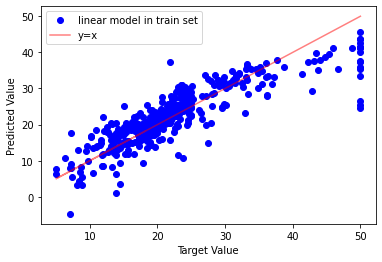

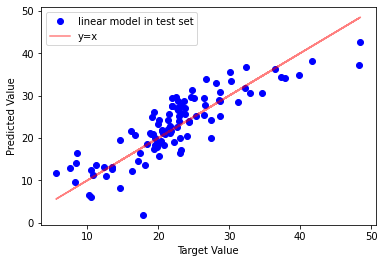

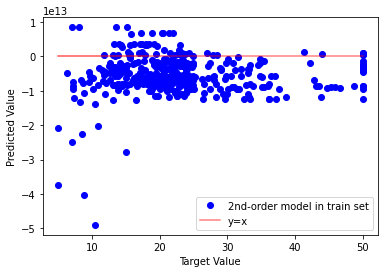

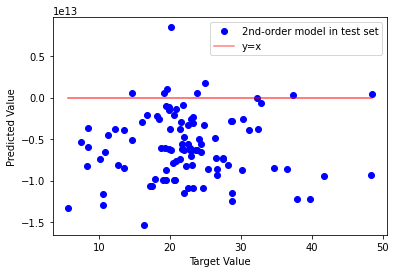

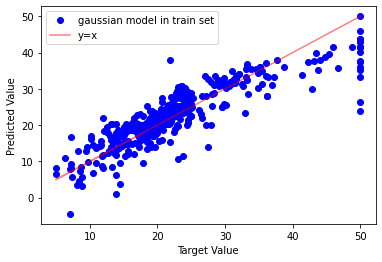

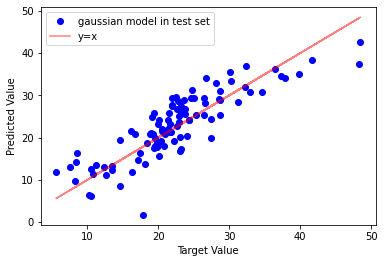

In [22]:
plt.figure()
plt.plot(train_t, predicted_train_set_with_linear_model, 'bo', label='linear model in train set')
plt.plot(train_t, train_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();

plt.figure()
plt.plot(test_t, predicted_test_set_with_linear_model, 'bo', label='linear model in test set')
plt.plot(test_t, test_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();



plt.figure()
plt.plot(train_t, predicted_train_set_with_second_order_model, 'bo', label='2nd-order model in train set')
plt.plot(train_t, train_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();

plt.figure()
plt.plot(test_t, predicted_test_set_with_second_order_model, 'bo', label='2nd-order model in test set')
plt.plot(test_t, test_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();



plt.figure()
plt.plot(train_t, predicted_train_set_with_gaussian_model, 'bo', label='gaussian model in train set')
plt.plot(train_t, train_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();

plt.figure()
plt.plot(test_t, predicted_test_set_with_gaussian_model, 'bo', label='gaussian model in test set')
plt.plot(test_t, test_t, 'r-', label='y=x', alpha=0.5)
plt.ylabel('Predicted Value')
plt.xlabel('Target Value')
plt.legend();